### Recurrent Neural Networks (RNNs) are a type of neural network architecture that is particularly well-suited for tasks involving sequential data. Unlike feedforward neural networks, which process data in fixed-size chunks, RNNs can handle input sequences of arbitrary length.

#### key features of RNNs:

- Recurrent Connections: RNNs have recurrent connections that allow information to persist across different time steps in a sequence. This means that information from previous inputs is considered when processing the current input.

- Shared Parameters: The same set of weights and biases are applied at each time step. This allows the network to use the same computation for different elements of the sequence.

- Time Dependency: RNNs are well-suited for tasks where the order or temporal dependency of data matters, such as time series prediction, language modeling, and speech recognition.


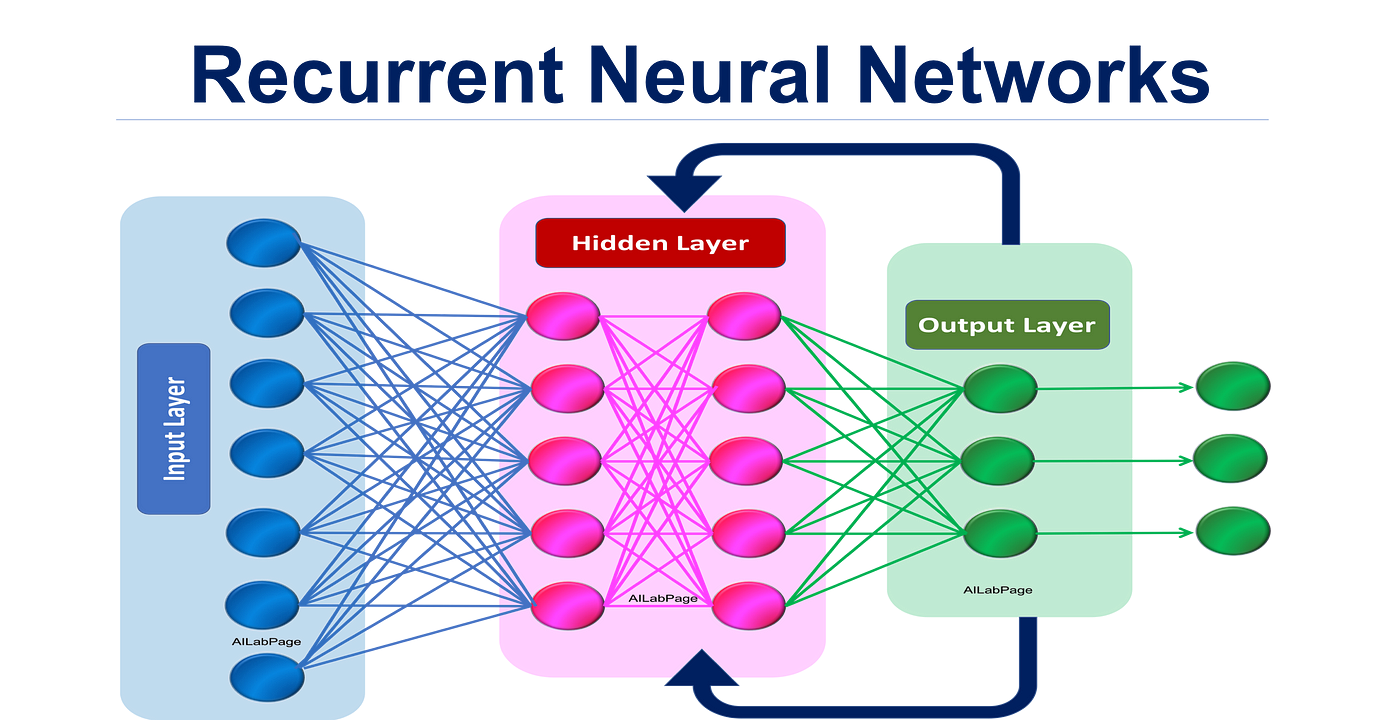
### Applications of RNNs:

- Language Modeling and Text Generation: RNNs can be used to model the probability distribution of sequences of words. This enables tasks like auto-completion, machine translation, and text generation.

- Time Series Prediction: RNNs are effective for tasks like stock price prediction, weather forecasting, and any scenario where the current state depends on previous states.

- Speech Recognition: RNNs can be used to convert spoken language into written text. This is crucial for applications like voice assistants (e.g., Siri, Alexa).

- Handwriting Recognition: RNNs can recognize handwritten text, enabling applications like digit recognition and signature verification.

- Image Captioning: RNNs can be combined with Convolutional Neural Networks (CNNs) to generate captions for images.

- Video Analysis: RNNs can process sequences of images or video frames, making them useful for tasks like action recognition, video captioning, and video prediction.

- Anomaly Detection: RNNs can be used to detect anomalies in sequences of data, making them valuable for tasks like fraud detection in finance or detecting defects in manufacturing.

- Sentiment Analysis: RNNs can analyze sequences of text to determine the sentiment expressed.


### Mathematical Implementation:

Terms:
- xt: Input at time step at t
- ht: Hidden state at time step at t
- Whx: Weight matrix for input-to-hidden connections
- Whh: Weight matrix for hidden-to-hidden connections
- bh:Bias term for hidden layer
- Wyh: Weight matrix for hidden-to-output connection
- by: Bias term for output layer

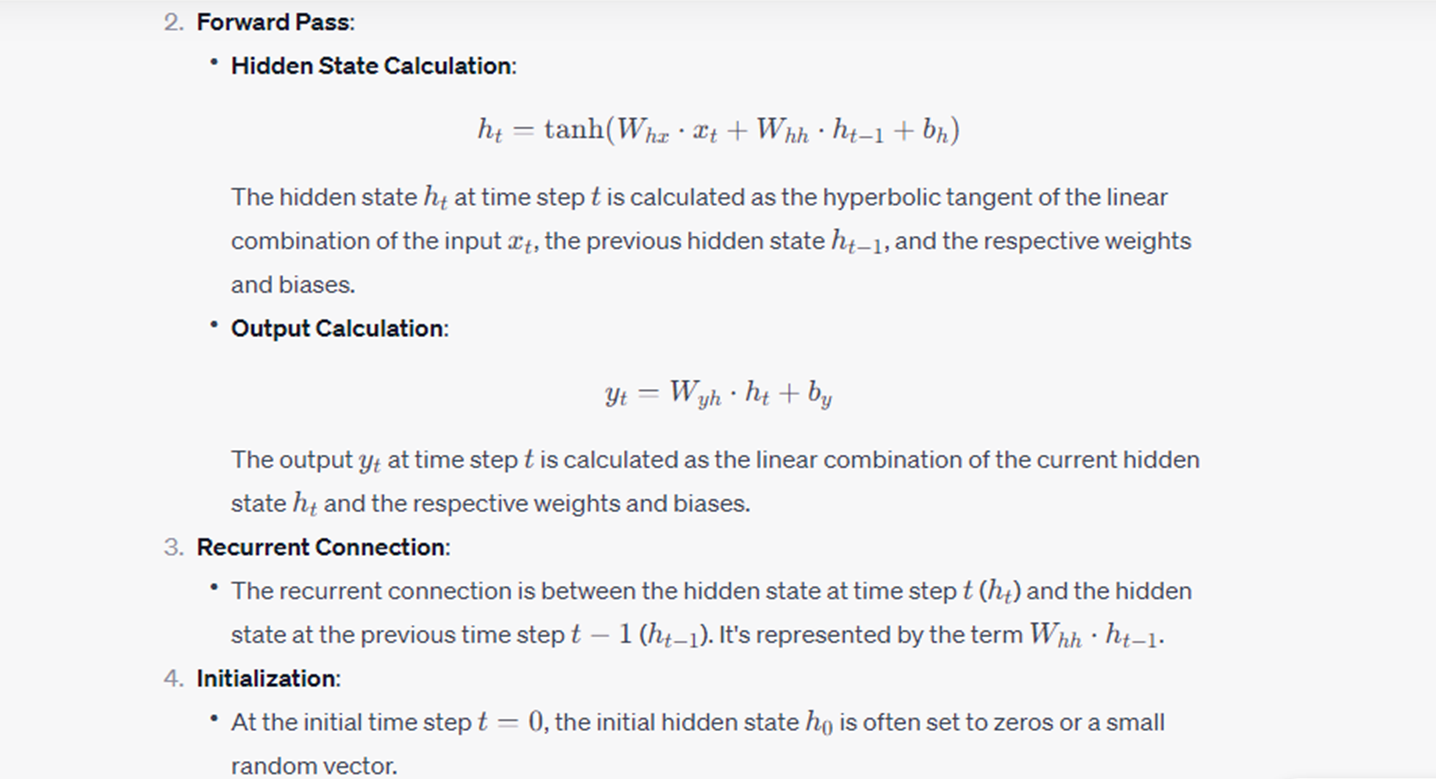



### Training:

During training, you would use backpropagation through time (BPTT) to compute gradients and update the weights and biases to minimize the loss function.
Prediction:

Once the network is trained, you can make predictions by passing a sequence of inputs through the network.
This is a basic mathematical interpretation of a simple RNN. In practice, more sophisticated variants like LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) are often used to address issues like vanishing gradients and better capture long-term dependencies.

### Below is a basic implementation of a simple RNN using only the NumPy library. This code demonstrates how you can manually perform forward passes through time.

In [ ]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the hyperbolic tangent (tanh) activation function
def tanh(x):
    return np.tanh(x)

# Define the derivative of the tanh activation function
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Define the RNN class
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W_hx = np.random.randn(hidden_size, input_size)
        self.W_hh = np.random.randn(hidden_size, hidden_size)
        self.W_yh = np.random.randn(output_size, hidden_size)
        self.b_h = np.zeros((hidden_size, 1))
        self.b_y = np.zeros((output_size, 1))
        
    def forward(self, x):
        # Initialize hidden state
        h = np.zeros((self.W_hx.shape[0], 1))
        
        # Lists to store intermediate values
        self.h_states = []
        self.x_inputs = []
        
        for t in range(len(x)):
            # Update hidden state
            h = tanh(np.dot(self.W_hx, x[t]) + np.dot(self.W_hh, h) + self.b_h)
            self.h_states.append(h)
            self.x_inputs.append(x[t])
            
        # Calculate output
        y = np.dot(self.W_yh, h) + self.b_y
        
        return y, h
    
    def backward(self, x, y_true, learning_rate):
        # Initialize gradients
        dW_hx, dW_hh, dW_yh = np.zeros_like(self.W_hx), np.zeros_like(self.W_hh), np.zeros_like(self.W_yh)
        db_h, db_y = np.zeros_like(self.b_h), np.zeros_like(self.b_y)
        dh_next = np.zeros_like(self.h_states[0])
        
        for t in reversed(range(len(x))):
            # Compute gradients
            dy = y_true - x[t]
            dW_yh += np.dot(dy, self.h_states[t].T)
            db_y += dy
            dh = np.dot(self.W_yh.T, dy) + dh_next
            dh_raw = tanh_derivative(self.h_states[t]) * dh
            db_h += dh_raw
            dW_hx += np.dot(dh_raw, self.x_inputs[t].T)
            dW_hh += np.dot(dh_raw, self.h_states[t-1].T)
            dh_next = np.dot(self.W_hh.T, dh_raw)
        
        # Clip gradients to avoid exploding gradients (optional)
        for gradient in [dW_hx, dW_hh, dW_yh, db_h, db_y]:
            np.clip(gradient, -5, 5, out=gradient)
        
        # Update weights and biases
        self.W_hx -= learning_rate * dW_hx
        self.W_hh -= learning_rate * dW_hh
        self.W_yh -= learning_rate * dW_yh
        self.b_h -= learning_rate * db_h
        self.b_y -= learning_rate * db_y


### Explanation:

- The code defines a basic RNN class (SimpleRNN) with methods for forward pass (forward) and backward pass (backward).

- The activation functions (sigmoid and tanh) and their derivatives are defined.

- The forward method performs a forward pass through the RNN, storing intermediate values for backpropagation.

- The backward method computes gradients and updates the weights and biases using backpropagation through time (BPTT).

### Let us use Keras library to create and train a basic RNN for a toy example of sequence prediction. This example uses a very simple sequence (1, 2, 3, 4, 5) and tries to predict the next number in the sequence.



Let's create a simple RNN using Keras with some sam
ple data. In this example, we'll use a sequence of numbers to predict the next number in the sequence.


In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate some sample data
X = np.array([[i+j for j in range(5)] for i in range(100)])
y = np.array([i+5 for i in range(100)])


In [4]:
X ,y

(array([[  0,   1,   2,   3,   4],
        [  1,   2,   3,   4,   5],
        [  2,   3,   4,   5,   6],
        [  3,   4,   5,   6,   7],
        [  4,   5,   6,   7,   8],
        [  5,   6,   7,   8,   9],
        [  6,   7,   8,   9,  10],
        [  7,   8,   9,  10,  11],
        [  8,   9,  10,  11,  12],
        [  9,  10,  11,  12,  13],
        [ 10,  11,  12,  13,  14],
        [ 11,  12,  13,  14,  15],
        [ 12,  13,  14,  15,  16],
        [ 13,  14,  15,  16,  17],
        [ 14,  15,  16,  17,  18],
        [ 15,  16,  17,  18,  19],
        [ 16,  17,  18,  19,  20],
        [ 17,  18,  19,  20,  21],
        [ 18,  19,  20,  21,  22],
        [ 19,  20,  21,  22,  23],
        [ 20,  21,  22,  23,  24],
        [ 21,  22,  23,  24,  25],
        [ 22,  23,  24,  25,  26],
        [ 23,  24,  25,  26,  27],
        [ 24,  25,  26,  27,  28],
        [ 25,  26,  27,  28,  29],
        [ 26,  27,  28,  29,  30],
        [ 27,  28,  29,  30,  31],
        [ 28,  29,  

In [5]:
# Reshape the data for RNN input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [6]:

# Define the RNN model
model = Sequential([
    SimpleRNN(units=32, input_shape=(X.shape[1], X.shape[2]), activation='relu'),
    Dense(1)
])


C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=80, batch_size=20)


Epoch 1/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.7850
Epoch 2/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3034
Epoch 3/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1377
Epoch 4/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1295
Epoch 5/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1034
Epoch 6/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0655
Epoch 7/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0565
Epoch 8/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0475
Epoch 9/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0395
Epoch 10/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0312
Epoch 11/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0269
Epoch 12/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0288
Epoch 13/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0274
Epoch 14/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0304
Epoch 15/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0232
Epoch 16/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [26]:

# Test the model
test_input = np.array([[i+j for j in range(5)] for i in range(200, 230)])
test_input = test_input.reshape((test_input.shape[0], test_input.shape[1], 1))
predicted_output = model.predict(test_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


In [27]:
test_input

array([[[200],
        [201],
        [202],
        [203],
        [204]],

       [[201],
        [202],
        [203],
        [204],
        [205]],

       [[202],
        [203],
        [204],
        [205],
        [206]],

       [[203],
        [204],
        [205],
        [206],
        [207]],

       [[204],
        [205],
        [206],
        [207],
        [208]],

       [[205],
        [206],
        [207],
        [208],
        [209]],

       [[206],
        [207],
        [208],
        [209],
        [210]],

       [[207],
        [208],
        [209],
        [210],
        [211]],

       [[208],
        [209],
        [210],
        [211],
        [212]],

       [[209],
        [210],
        [211],
        [212],
        [213]],

       [[210],
        [211],
        [212],
        [213],
        [214]],

       [[211],
        [212],
        [213],
        [214],
        [215]],

       [[212],
        [213],
        [214],
        [215],
        [216]],


In [28]:

# Print the predicted output
print("Predicted Output:")
predicted_output

Predicted Output:


array([[205.17532],
       [206.17657],
       [207.17784],
       [208.17908],
       [209.18033],
       [210.18161],
       [211.18285],
       [212.18411],
       [213.18536],
       [214.18661],
       [215.18788],
       [216.18915],
       [217.1904 ],
       [218.19164],
       [219.19292],
       [220.19415],
       [221.19543],
       [222.19669],
       [223.19794],
       [224.19919],
       [225.20044],
       [226.2017 ],
       [227.20294],
       [228.20422],
       [229.20547],
       [230.20676],
       [231.20798],
       [232.20924],
       [233.2105 ],
       [234.21176]], dtype=float32)

### Let's create a simple RNN using Keras with some sample data. In this example, we'll use a sequence of numbers to predict the next number in the sequence.

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [ ]:
# Generate some sample data
np.random.seed(0)
sequence_length = 10
X = np.random.rand(100, sequence_length)
y = np.sum(X, axis=1)
# Reshape the data for RNN input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
X

In [ ]:
y

In [ ]:

# Define the RNN model
model = Sequential([
    SimpleRNN(units=32, input_shape=(X.shape[1], X.shape[2]), activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:


# Train the model
model.fit(X, y, epochs=10, batch_size=8)



In [ ]:
# Test the model
test_input = np.random.rand(10).reshape((1, sequence_length, 1))
predicted_output = model.predict(test_input)

test_input 

In [ ]:


# Print the predicted output
print("Predicted Output:", predicted_output[0, 0])
